In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('BRAZIL_CITIES_REV2022.CSV')
df

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,Áurea,RS,0,3665,3665,0,1222,548,674,1525,...,2,0,117198141,1435,400,0,0,0,0,1
5574,Ângulo,PR,0,2859,2844,15,929,737,192,2246,...,0,0,0,898,415,0,0,0,0,1
5575,Érico Cardoso,BA,0,10859,10859,0,2659,542,2117,1999,...,0,0,0,655,1020,0,0,0,0,1
5576,Óbidos,PA,0,49333,49324,9,11263,6068,5195,25295,...,3,0,184494811,938,4985,0,0,0,0,1


In [6]:
# Verificar valores ausentes
print(df.isnull().sum())

# Separar colunas numéricas e categóricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
colunas_categoricas = df.select_dtypes(include=['object']).columns

# Imputação de valores ausentes em colunas numéricas com a média
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].mean())

# Imputação de valores ausentes em colunas categóricas com o valor mais frequente (moda)
df[colunas_categoricas] = df[colunas_categoricas].fillna(df[colunas_categoricas].mode().iloc[0])

# Verificar novamente se ainda há valores ausentes
print(df.isnull().sum())

print(df.isna().sum())


CITY                 0
STATE                0
CAPITAL              0
IBGE_RES_POP         0
IBGE_RES_POP_BRAS    0
                    ..
Wheeled_tractor      0
UBER                 0
MAC                  0
WAL-MART             0
POST_OFFICES         0
Length: 81, dtype: int64


In [6]:
columns_to_drop = [col for col in df.columns if col.startswith('IDHM') and col != 'IDHM']

df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4


In [7]:
linhas, colunas = df_cleaned.shape
print(f"O dataset tem {linhas} linhas e {colunas} colunas.")


O dataset tem 5578 linhas e 77 colunas.


<Axes: >

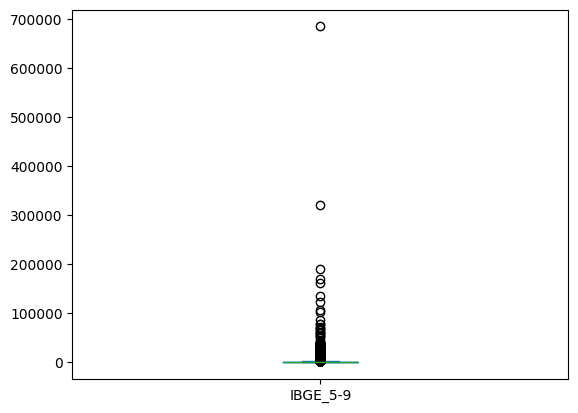

In [8]:

df_cleaned['IBGE_5-9'].plot(kind = 'box')


In [9]:
df = df_cleaned.drop(columns=['CITY', 'STATE', 'MAC', 'WAL-MART', 'POST_OFFICES', 'FIXED_PHONES', 'UBER','CAPITAL'])

df = pd.get_dummies(df, drop_first=True)  # One-hot encoding


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [11]:
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])


In [12]:
df_numerico.describe()


,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,...,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor
count,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5578.000000,5578.000000,5578.000000,...,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5578.000000
mean,3.422313e+04,3.414573e+04,77.404625,1.028313e+04,8.842319e+03,1440.807458,2.755270e+04,382.669236,1542.089100,2065.965041,...,40.990498,2.029043,1.696128,0.787558,0.947293,5.500436e+09,3.598663e+09,9.839788e+03,4.869557e+03,5.739871
std,2.028829e+05,2.012627e+05,1793.789719,6.469199e+04,6.428575e+04,1690.483808,1.857468e+05,2324.175869,9242.622881,12299.577788,...,307.616725,26.545286,11.232110,1.780055,1.069279,2.775752e+11,1.164327e+11,9.175728e+04,2.091673e+04,55.301718
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.217000e+03,5.214000e+03,0.000000,1.565250e+03,8.700000e+02,469.250000,2.784250e+03,38.000000,158.000000,219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,5.990000e+02,5.880000e+02,0.000000
50%,1.092650e+04,1.091600e+04,0.000000,3.167000e+03,1.839500e+03,916.000000,6.156000e+03,92.000000,376.000000,514.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,2.319925e+07,1.431500e+03,1.280000e+03,0.000000
75%,2.340900e+04,2.338000e+04,10.000000,6.722500e+03,4.618750e+03,1811.750000,1.529875e+04,232.000000,949.750000,1299.000000,...,0.000000,1.000000,2.000000,1.000000,2.000000,4.774853e+07,1.991191e+08,4.084000e+03,3.292750e+03,1.000000
max,1.125350e+07,1.113378e+07,119727.000000,3.576148e+06,3.548433e+06,33809.000000,1.046364e+07,129464.000000,514794.000000,684443.000000,...,13247.000000,1693.000000,626.000000,83.000000,8.000000,1.947077e+13,8.016164e+12,5.740995e+06,1.134570e+06,3236.000000


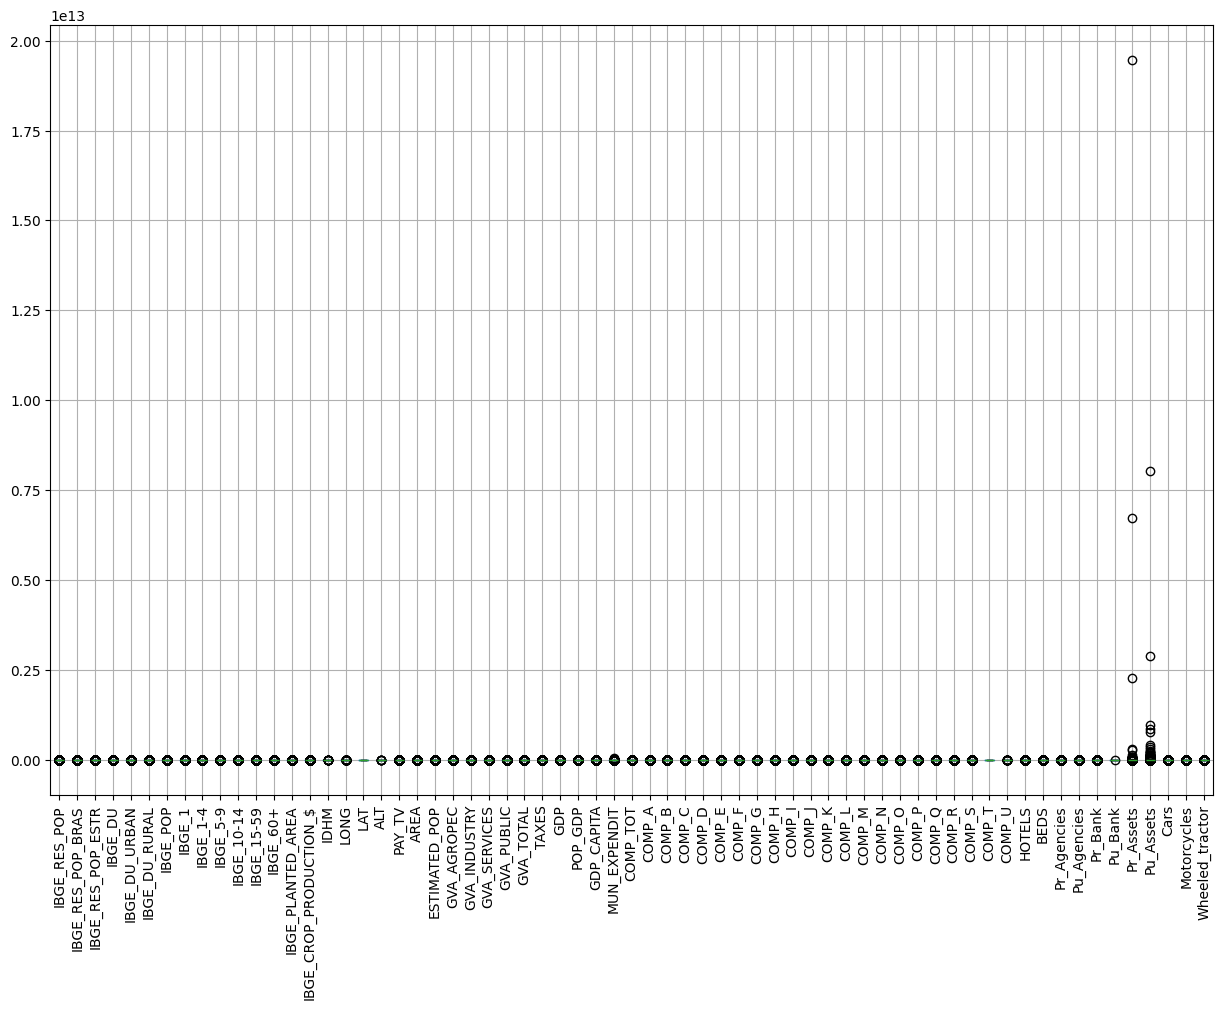

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para todas as colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])
df_numerico.boxplot(figsize=(15, 10), rot=90)
plt.show()


In [14]:
# Cálculo do IQR (Intervalo Interquartil)
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Exibir limites calculados para cada coluna
print("Limites Inferiores:")
print(lower_bound)
print("Limites Superiores:")
print(upper_bound)


# Remover linhas com qualquer valor fora dos limites em qualquer coluna
df_sem_outliers = df[~((df_numerico < lower_bound) | (df_numerico > upper_bound)).any(axis=1)]

# Verificar quantas linhas foram removidas
print(f"Linhas antes da remoção de outliers: {df.shape[0]}")
print(f"Linhas após a remoção de outliers: {df_sem_outliers.shape[0]}")



Limites Inferiores:
IBGE_RES_POP        -2.207100e+04
IBGE_RES_POP_BRAS   -2.203500e+04
IBGE_RES_POP_ESTR   -1.500000e+01
IBGE_DU             -6.170625e+03
IBGE_DU_URBAN       -4.753125e+03
                         ...     
Pr_Assets           -7.162280e+07
Pu_Assets           -2.986786e+08
Cars                -4.628500e+03
Motorcycles         -3.469125e+03
Wheeled_tractor     -1.500000e+00
Length: 65, dtype: float64
Limites Superiores:
IBGE_RES_POP         5.069700e+04
IBGE_RES_POP_BRAS    5.062900e+04
IBGE_RES_POP_ESTR    2.500000e+01
IBGE_DU              1.445838e+04
IBGE_DU_URBAN        1.024188e+04
                         ...     
Pr_Assets            1.193713e+08
Pu_Assets            4.977977e+08
Cars                 9.311500e+03
Motorcycles          7.349875e+03
Wheeled_tractor      2.500000e+00
Length: 65, dtype: float64
Linhas antes da remoção de outliers: 5578
Linhas após a remoção de outliers: 2166


In [15]:

from sklearn.model_selection import train_test_split

X = df_sem_outliers.drop('IDHM', axis=1)
y = df_sem_outliers['IDHM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


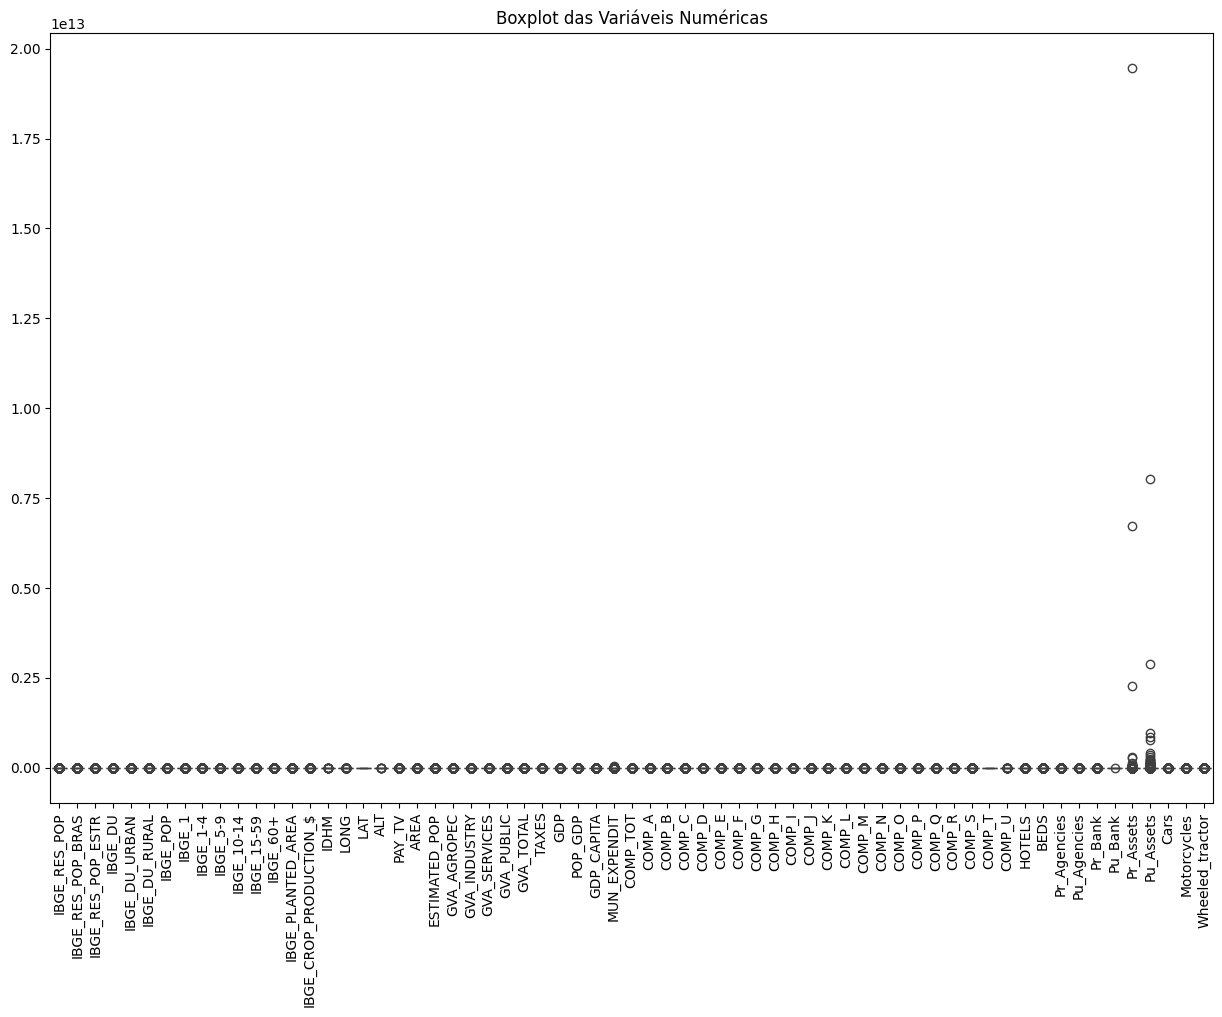

In [16]:
# prompt: faça o grafico para mostrar os outliers do seanborn

import matplotlib.pyplot as plt
# Criar um boxplot com Seaborn para visualizar os outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numerico)
plt.xticks(rotation=90)
plt.title('Boxplot das Variáveis Numéricas')
plt.show()


<Axes: >

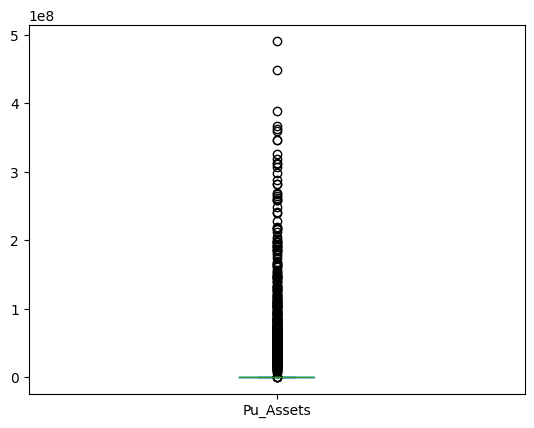

In [17]:
df_sem_outliers['Pu_Assets'].plot(kind = 'box')


In [18]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.0008453134296198609
R-squared (R2): 0.7786225193464675


Melhor valor de k: 9


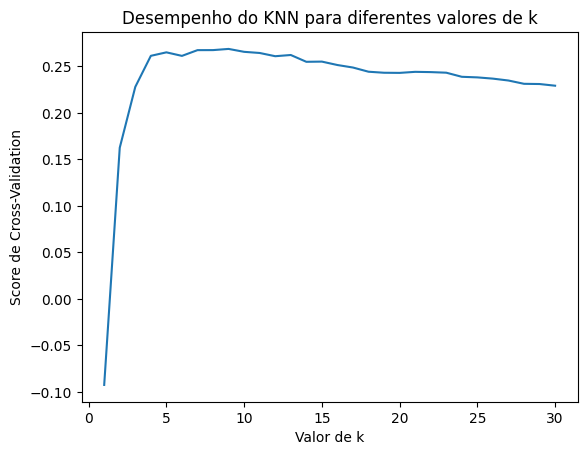

In [19]:
# prompt: veja qual e o melhor k para o problema em questao

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Lista de valores de k a serem testados
k_values = list(range(1, 31))

# Lista para armazenar os scores de cada valor de k
scores = []

# Loop para testar cada valor de k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    scores.append(cv_scores.mean())

# Encontrar o melhor valor de k
best_k = k_values[scores.index(max(scores))]
print(f"Melhor valor de k: {best_k}")

# Plotar os scores para visualizar o desempenho para cada valor de k
plt.plot(k_values, scores)
plt.xlabel("Valor de k")
plt.ylabel("Score de Cross-Validation")
plt.title("Desempenho do KNN para diferentes valores de k")
plt.show()


In [20]:
# Importar as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Passo 1: Preparar os dados
# df_sem_outliers já foi filtrado anteriormente
X = df_sem_outliers.drop(columns=['IDHM'])  # Atributos explicativos (remover o IDHM)
y = df_sem_outliers['IDHM']  # Variável alvo

# Passo 2: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passo 4: Ajustar o valor de k (KNN com validação cruzada)
param_grid = {'n_neighbors': range(1, 31)}  # Testar valores de k de 1 a 30
knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')  # Usar R² como métrica de avaliação
grid_search.fit(X_train_scaled, y_train)

# Melhor valor de k
best_k = grid_search.best_params_['n_neighbors']
print(f"Melhor valor de k: {best_k}")

# Passo 5: Treinar o modelo KNN com o melhor k encontrado
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Passo 6: Fazer previsões no conjunto de teste
y_pred = knn_best.predict(X_test_scaled)

# Passo 7: Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Melhor valor de k: 8
Mean Squared Error (MSE): 0.0011381064588133639
R-squared (R²): 0.7019435256329494


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Passo 1: Preparar os dados
X = df_sem_outliers.drop(columns=['IDHM'])  # Atributos explicativos (remover o IDHM)
y = df_sem_outliers['IDHM']  # Variável alvo

# Passo 2: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passo 4: Ajustar hiperparâmetros da árvore de decisão com validação cruzada
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Melhores hiperparâmetros
best_params = grid_search.best_params_
print(f"Melhores hiperparâmetros: {best_params}")

# Passo 5: Treinar a árvore de decisão com os melhores hiperparâmetros
tree_best = DecisionTreeRegressor(random_state=42, **best_params)
tree_best.fit(X_train_scaled, y_train)

# Passo 6: Fazer previsões no conjunto de teste
y_pred = tree_best.predict(X_test_scaled)

# Passo 7: Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Melhores hiperparâmetros: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Squared Error (MSE): 0.0011865767556923077
R-squared (R²): 0.6892497343910253


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Passo 1: Preparar os dados
X = df_sem_outliers.drop(columns=['IDHM'])  # Atributos explicativos (remover o IDHM)
y = df_sem_outliers['IDHM']  # Variável alvo

X = df_sem_outliers.drop(columns=['IDHM'])  # Atributos explicativos (remover o IDHM)
y = df_sem_outliers['IDHM']  # Variável alvo
# Passo 2: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passo 4: Ajustar hiperparâmetros da Random Forest com validação cruzada
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Melhores hiperparâmetros
best_params = grid_search.best_params_
print(f"Melhores hiperparâmetros: {best_params}")

# Passo 5: Treinar a Random Forest com os melhores hiperparâmetros
rf_best = RandomForestRegressor(random_state=42, **best_params)
rf_best.fit(X_train_scaled, y_train)

# Passo 6: Fazer previsões no conjunto de teste
y_pred = rf_best.predict(X_test_scaled)

# Passo 7: Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 0.0007041682347268186
R-squared (R²): 0.8155867583575821


In [23]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Passo 1: Preparar os dados
X = df_sem_outliers.drop(columns=['IDHM'])  # Atributos explicativos (remover o IDHM)
y = df_sem_outliers['IDHM']  # Variável alvo

# Passo 2: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passo 4: Ajustar hiperparâmetros da ExtraTrees com validação cruzada
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

et_model = ExtraTreesRegressor(random_state=42)
grid_search_et = GridSearchCV(et_model, param_grid, cv=5, scoring='r2')
grid_search_et.fit(X_train_scaled, y_train)

# Melhores hiperparâmetros
best_params_et = grid_search_et.best_params_
print(f"Melhores hiperparâmetros: {best_params_et}")

# Passo 5: Treinar o ExtraTrees com os melhores hiperparâmetros
et_best = ExtraTreesRegressor(random_state=42, **best_params_et)
et_best.fit(X_train_scaled, y_train)

# Passo 6: Fazer previsões no conjunto de teste
y_pred_et = et_best.predict(X_test_scaled)

# Passo 7: Avaliar o modelo
mse_et = mean_squared_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)

print(f"Mean Squared Error (MSE): {mse_et}")
print(f"R-squared (R²): {r2_et}")


Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error (MSE): 0.0007167926546186958
R-squared (R²): 0.8122805737254122
